In [1]:
# import forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR
import pandas as pd
import datetime
import matplotlib.pyplot as plt

c:\users\jonwo\miniconda3\lib\site-packages\pvlib\forecast.py:20: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [2]:
# specify location
latitude = 32.2
longitude = -110.9
tz = 'US/Arizona'

In [3]:
# specify time range of start of today to 7 days
start = pd.Timestamp(datetime.date.today(), tz=tz)
end = start + datetime.timedelta(days=7)

In [4]:
# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available
model = GFS()

In [5]:
# retrieve data. returns pandas.DataFrame object
data = model.get_processed_data(latitude, longitude,
start, end)

In [6]:
data.head()

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2021-10-10 02:00:00-07:00,14.687286,3.392805,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2021-10-10 05:00:00-07:00,12.874481,3.861574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2021-10-10 08:00:00-07:00,20.050018,2.669077,279.278553,683.037885,59.050885,0.0,0.0,0.0,0.0
2021-10-10 11:00:00-07:00,35.247131,2.725825,760.592549,870.685238,119.472213,0.0,0.0,0.0,0.0
2021-10-10 14:00:00-07:00,37.785248,2.003306,695.555427,867.530738,104.729144,0.0,0.0,0.0,0.0


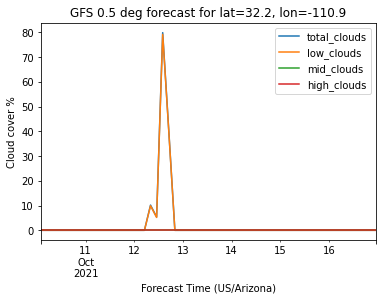

In [7]:
# plot cloud cover percentages
cloud_vars = ['total_clouds', 'low_clouds',
'mid_clouds', 'high_clouds']
data[cloud_vars].plot()
plt.ylabel('Cloud cover %')
plt.xlabel('Forecast Time ({})'.format(tz))
plt.title('GFS 0.5 deg forecast for lat={}, lon={}'
.format(latitude, longitude))
plt.legend()